In [1492]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

from warnings import filterwarnings
filterwarnings('ignore')


In [1493]:
df=pd.read_excel("Ogrenci_Performans.xlsx")

In [1494]:
df


,Cinsiyet,Ebeveyn Egitim Seviyesi,Okul Yemekhanesi,Ozel Ders,Matematik,Okuma,Yazma
0,Kadin,Lisans Mezunu,Yok,Yok,72,72,74
1,Kadin,Onlisans Mezunu,Yok,Var,69,90,88
2,Kadin,Yuksek Lisans Mezunu,Yok,Yok,90,95,93
3,Erkek,Onlisans Mezunu,Var,Yok,47,57,44
4,Erkek,Onlisans Mezunu,Yok,Yok,76,78,75
...,...,...,...,...,...,...,...
995,Kadin,Yuksek Lisans Mezunu,Yok,Var,88,99,95
996,Erkek,Lise Mezunu,Var,Yok,62,55,55
997,Kadin,Lise Mezunu,Var,Var,59,71,65
998,Kadin,Onlisans Mezunu,Yok,Var,68,78,77


In [1495]:
#Verilerimiz String halde ve sutün başlıklarımız ayrık halde olduğu için sütun başlıklarını ve veri türlerimizde düzenleme 
#yapılması gerek

In [1496]:
#Daha Kolay kullanabilmek için sütun isimlendirmede düzenlemeler yaptık.

In [1497]:
df.rename(columns={"Ebeveyn Egitim Seviyesi":"Ebeveyn_Egitim_Seviyesi","Okul Yemekhanesi":"Okul_yemekhanesi","Ozel Ders":"Ozel_Ders"},inplace=True)

In [1498]:
df

,Cinsiyet,Ebeveyn_Egitim_Seviyesi,Okul_yemekhanesi,Ozel_Ders,Matematik,Okuma,Yazma
0,Kadin,Lisans Mezunu,Yok,Yok,72,72,74
1,Kadin,Onlisans Mezunu,Yok,Var,69,90,88
2,Kadin,Yuksek Lisans Mezunu,Yok,Yok,90,95,93
3,Erkek,Onlisans Mezunu,Var,Yok,47,57,44
4,Erkek,Onlisans Mezunu,Yok,Yok,76,78,75
...,...,...,...,...,...,...,...
995,Kadin,Yuksek Lisans Mezunu,Yok,Var,88,99,95
996,Erkek,Lise Mezunu,Var,Yok,62,55,55
997,Kadin,Lise Mezunu,Var,Var,59,71,65
998,Kadin,Onlisans Mezunu,Yok,Var,68,78,77


In [1499]:
#Verilerimizi sayısal hale getiriyoruz.Makine öğreniminde kullanabilmek için

In [1500]:
df["Cinsiyet"]=df.Cinsiyet.map({"Kadin":1,"Erkek":0})

In [1501]:
df["Cinsiyet"]

0      1
1      1
2      1
3      0
4      0
      ..
995    1
996    0
997    1
998    1
999    1
Name: Cinsiyet, Length: 1000, dtype: int64

In [1502]:
df.Ebeveyn_Egitim_Seviyesi.unique()

array(['Lisans Mezunu', 'Onlisans Mezunu', 'Yuksek Lisans Mezunu',
       'Lise Mezunu'], dtype=object)

In [1503]:
df["Ebeveyn_Egitim_Seviyesi"]=df.Ebeveyn_Egitim_Seviyesi.map({"Lise Mezunu":1,"Onlisans Mezunu":2,"Lisans Mezunu":3,"Yuksek Lisans Mezunu":4})

In [1504]:
df

,Cinsiyet,Ebeveyn_Egitim_Seviyesi,Okul_yemekhanesi,Ozel_Ders,Matematik,Okuma,Yazma
0,1,3,Yok,Yok,72,72,74
1,1,2,Yok,Var,69,90,88
2,1,4,Yok,Yok,90,95,93
3,0,2,Var,Yok,47,57,44
4,0,2,Yok,Yok,76,78,75
...,...,...,...,...,...,...,...
995,1,4,Yok,Var,88,99,95
996,0,1,Var,Yok,62,55,55
997,1,1,Var,Var,59,71,65
998,1,2,Yok,Var,68,78,77


In [1505]:
df["Okul_yemekhanesi"]=df.Okul_yemekhanesi.map({"Var":1,"Yok":2})

In [1506]:
df

,Cinsiyet,Ebeveyn_Egitim_Seviyesi,Okul_yemekhanesi,Ozel_Ders,Matematik,Okuma,Yazma
0,1,3,2,Yok,72,72,74
1,1,2,2,Var,69,90,88
2,1,4,2,Yok,90,95,93
3,0,2,1,Yok,47,57,44
4,0,2,2,Yok,76,78,75
...,...,...,...,...,...,...,...
995,1,4,2,Var,88,99,95
996,0,1,1,Yok,62,55,55
997,1,1,1,Var,59,71,65
998,1,2,2,Var,68,78,77


In [1507]:
df["Ozel_Ders"]=df.Ozel_Ders.map({"Var":1,"Yok":0})

In [1508]:
df

,Cinsiyet,Ebeveyn_Egitim_Seviyesi,Okul_yemekhanesi,Ozel_Ders,Matematik,Okuma,Yazma
0,1,3,2,0,72,72,74
1,1,2,2,1,69,90,88
2,1,4,2,0,90,95,93
3,0,2,1,0,47,57,44
4,0,2,2,0,76,78,75
...,...,...,...,...,...,...,...
995,1,4,2,1,88,99,95
996,0,1,1,0,62,55,55
997,1,1,1,1,59,71,65
998,1,2,2,1,68,78,77


In [1509]:
#Burada bağımlı bağımsız değşkenlerimizi ayırmış olduk.
#X bağımsız değişken
#Y bağımlı değişken.

In [1510]:
X=df.drop(['Matematik','Okuma','Yazma'],axis=1)# Axis 1 olduğu zaman sütunlarla çalıştığımız belirlenir.
y=(df[['Matematik','Okuma','Yazma']])

In [1511]:
X.head()

,Cinsiyet,Ebeveyn_Egitim_Seviyesi,Okul_yemekhanesi,Ozel_Ders
0,1,3,2,0
1,1,2,2,1
2,1,4,2,0
3,0,2,1,0
4,0,2,2,0


In [1512]:
y.head()

,Matematik,Okuma,Yazma
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [1513]:
knn_model=KNeighborsRegressor()#Modelimizi oluşturduk. Makine öğrenmesi olarak En yakın komşu modelini seçtik.

In [1514]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [1515]:
knn_modeleniyi.fit(X_train,y_train)#Modelimize eğitim verilerimizi gönderip eğittik

KNeighborsRegressor(n_neighbors=29)

In [1516]:
#Komşu sayımıza göre modelimizin doğruluk tablosu

([<matplotlib.axis.XTick at 0x2a19b456ec0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

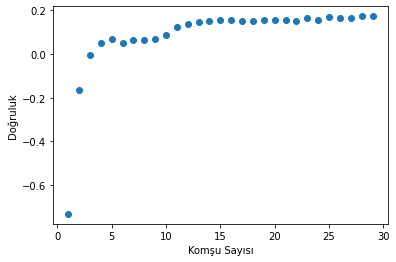

In [1517]:
k_range=range(1,30)
scores=[]
for k in k_range:
    knn1=KNeighborsRegressor(n_neighbors=k)
    knn1.fit(X_train,y_train)
    scores.append(knn1.score(X_test,y_test))
    
    
plt.figure()
plt.xlabel("Komşu Sayısı")
plt.ylabel("Doğruluk")
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20,25,30])

In [1518]:
knn_modeleniyi=KNeighborsRegressor(n_neighbors=29)#En iyi komşu değerini 29 bulduk.

In [1519]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [1520]:
knn_modeleniyi.fit(X_train,y_train)#Modelimize eğitim verilerimizi gönderip eğittik

KNeighborsRegressor(n_neighbors=29)

In [1521]:
model=knn_modeleniyi.fit(X_train,y_train)

In [1522]:
model

KNeighborsRegressor(n_neighbors=29)

In [1523]:
#KNN Modelimizin başarı oranı

In [1524]:
print('K-NN için eğitim seti performansı:{:.2f}'.format(knn_modeleniyi.score(X_train,y_train)))
print('K-NN için test seti performansı:{:.2f}'.format(knn_modeleniyi.score(X_test,y_test)))

K-NN için eğitim seti performansı:0.26
K-NN için test seti performansı:0.17


In [1525]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier().fit(X_train,y_train)

In [1526]:
#print('Karar Ağaçları için eğitim seti performansı:{:.2f}'.format(clf.score(X_train,y_train)))
#print('Karar Ağaçları test için seti performansı:{:.2f}'.format(clf.score(X_test,y_test)))

In [1527]:
#Kullanılan Makine öğrenmesi türlerinin hatalarına göre karşılaştırılması

In [1528]:
modelknn=knn_modeleniyi.fit(X_train,y_train)#Knn için öğrenme yaptık

In [1529]:
modelclf=clf.fit(X_train,y_train)#Karar Ağacı için öğrenme yaptık

In [1530]:
y_predknn=modelknn.predict(X_test)

In [1531]:
y_predclf=modelclf.predict(X_test)

In [1532]:
np.sqrt(mean_squared_error(y_test,y_predclf)) #KararAğacının test hatasını öğrenme

17.29730229448126

In [1533]:
np.sqrt(mean_squared_error(y_test,y_predknn)) #En yakın komşu test hatası

13.99493743752723

In [1534]:
np.sqrt(mean_squared_error(y_train,modelclf.predict(X_train)))#KararAğacının öğrenme hatasını öğrenme

16.60419123795756

In [1535]:
np.sqrt(mean_squared_error(y_train,modelknn.predict(X_train))) #En yakın komşu öğrenme hatasını öğrenme

12.761471780696478

In [1536]:
#Buradan En yakın komşu makine öğrenmesinin daha az hatalı olduğunu görüyoruz karar ağaçlarına göre

In [1537]:
#Okumanın yazma ve Matematik üzerinde etkisi

<AxesSubplot:xlabel='Okuma', ylabel='Matematik'>

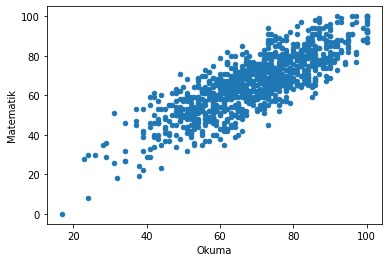

In [1538]:
%matplotlib inline
df.plot(x="Okuma",y="Matematik",kind="scatter")

<AxesSubplot:xlabel='Okuma', ylabel='Yazma'>

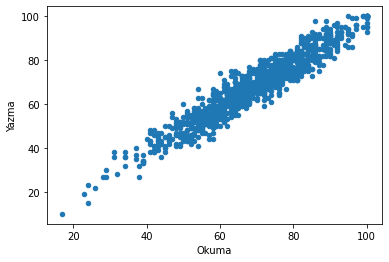

In [1539]:
%matplotlib inline
df.plot(x="Okuma",y="Yazma",kind="scatter")

<AxesSubplot:xlabel='Matematik', ylabel='Ozel_Ders'>

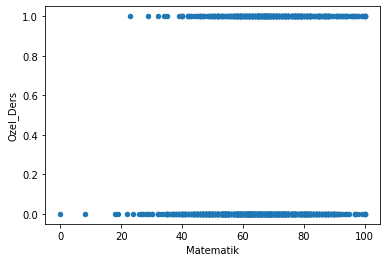

In [1540]:
%matplotlib inline
df.plot(x="Matematik",y="Ozel_Ders",kind="scatter")

<AxesSubplot:xlabel='Ozel_Ders', ylabel='Okuma'>

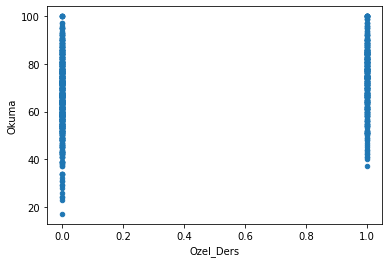

In [1541]:
%matplotlib inline
df.plot(x="Ozel_Ders",y="Okuma",kind="scatter")

In [1542]:
#Ozel Ders Almanın Başarıya etkisi -KNN

In [1543]:
modelll=knn_modeleniyi.fit(X_train,y_train)

In [1544]:
yeni_veriozelders=[[1],[3],[2],[1]]

In [1545]:
yeni_veriozelders=pd.DataFrame(yeni_veriozelders).T

In [1546]:
modelll.predict(yeni_veriozelders) 

array([[76.17241379, 80.96551724, 83.06896552]])

In [1547]:
yeni_veriozelderssiz=[[1],[3],[2],[0]]

In [1548]:
yeni_veriozelderssiz=pd.DataFrame(yeni_veriozelderssiz).T

In [1549]:
modelll.predict(yeni_veriozelderssiz) 

array([[70.17241379, 76.13793103, 76.06896552]])

In [1550]:
#Ozel Ders Almanın Başarıya etkisi -Karar Ağaçları

In [1551]:
modelagac=clf.fit(X_train,y_train)

In [1552]:
yeni_veriozelders=[[1],[3],[2],[1]]

In [1553]:
yeni_veriozelders=pd.DataFrame(yeni_veriozelders).T

In [1554]:
modelagac.predict(yeni_veriozelders)

array([[ 71, 100,  81]], dtype=int64)

In [1555]:
yeni_veriozelderssiz=[[1],[3],[2],[0]]

In [1556]:
yeni_veriozelderssiz=pd.DataFrame(yeni_veriozelderssiz).T

In [1557]:
modelclf.predict(yeni_veriozelderssiz) 

array([[65, 72, 74]], dtype=int64)

In [1558]:
##Cinsiyetin Başarıya etkisi--KNN

In [1559]:
yeni_verikadın=[[1],[3],[2],[1]]

In [1560]:
yeni_verikadın=pd.DataFrame(yeni_verikadın).T

In [1561]:
modelll.predict(yeni_verikadın) 

array([[76.17241379, 80.96551724, 83.06896552]])

In [1562]:
yeni_verierkek=[[0],[3],[2],[1]]

In [1563]:
yeni_verierkek=pd.DataFrame(yeni_verierkek).T

In [1564]:
modelll.predict(yeni_verierkek) 

array([[75.93103448, 73.13793103, 74.27586207]])

In [1565]:
##Cinsiyetin Başarıya etkisi--Karar Ağaçları

In [1566]:
yeni_verikadın=[[1],[3],[2],[1]]

In [1567]:
yeni_verikadın=pd.DataFrame(yeni_verikadın).T

In [1568]:
modelagac.predict(yeni_verikadın)

array([[ 71, 100,  81]], dtype=int64)

In [1569]:
yeni_verierkek=[[0],[3],[2],[1]]

In [1570]:
yeni_verierkek=pd.DataFrame(yeni_verierkek).T

In [1571]:
modelagac.predict(yeni_verierkek)

array([[63, 64, 66]], dtype=int64)

In [1572]:
#okul yemekhaesinin Başarıya etkisi-KNN

In [1573]:
yeni_veriyemekvar=[[1],[3],[1],[1]]

In [1574]:
yeni_veriyemekvar=pd.DataFrame(yeni_veriyemekvar).T

In [1575]:
modelll.predict(yeni_veriyemekvar) 

array([[70.31034483, 79.06896552, 79.82758621]])

In [1576]:
yeni_veriyemekyok=[[1],[3],[2],[1]]

In [1577]:
yeni_veriyemekyok=pd.DataFrame(yeni_veriyemekyok).T

In [1578]:
modelll.predict(yeni_veriyemekyok) 

array([[76.17241379, 80.96551724, 83.06896552]])

In [1579]:
#okul yemekhaesinin Başarıya etkisi-Karar Ağaçları

In [1580]:
yeni_veriyemekvar=[[1],[3],[1],[1]]

In [1581]:
yeni_veriyemekvar=pd.DataFrame(yeni_veriyemekvar).T

In [1582]:
modelagac.predict(yeni_veriyemekvar) 

array([[ 47, 100, 100]], dtype=int64)

In [1583]:
yeni_veriyemekyok=[[1],[3],[2],[1]]

In [1584]:
yeni_veriyemekyok=pd.DataFrame(yeni_veriyemekyok).T

In [1585]:
modelagac.predict(yeni_veriyemekyok) 

array([[ 71, 100,  81]], dtype=int64)

In [1586]:
#Ebeveyn Eğitim Seviyesinin başarıya etkisi-KNN

In [1587]:
yeni_veriegitimyuksek=[[1],[4],[2],[1]]

In [1588]:
yeni_veriegitimyuksek=pd.DataFrame(yeni_veriegitimyuksek).T

In [1589]:
modelll.predict(yeni_veriegitimyuksek) 

array([[69.34482759, 78.20689655, 80.20689655]])

In [1590]:
yeni_veriegitimdusuk=[[1],[1],[2],[1]]

In [1591]:
yeni_veriegitimdusuk=pd.DataFrame(yeni_veriegitimdusuk).T

In [1592]:
modelll.predict(yeni_veriegitimdusuk) 

array([[69.5862069 , 76.13793103, 76.89655172]])

In [1593]:
#Ebeveyn Eğitim Seviyesinin başarıya etkisi-Karar Ağaçları

In [1594]:
yeni_veriegitimyuksek=[[1],[4],[2],[1]]

In [1595]:
yeni_veriegitimyuksek=pd.DataFrame(yeni_veriegitimyuksek).T

In [1596]:
modelagac.predict(yeni_veriegitimyuksek) 

array([[54, 64, 67]], dtype=int64)

In [1597]:
yeni_veriegitimdusuk=[[1],[1],[2],[1]]

In [1598]:
yeni_veriegitimdusuk=pd.DataFrame(yeni_veriegitimdusuk).T

In [1599]:
modelagac.predict(yeni_veriegitimdusuk) 

array([[59, 51, 74]], dtype=int64)

In [1600]:
#Modellerimize baktığımızda başarıyı en çok etkileyen faktorun Ebeveyn eğitim seviyesine bağlı olduğunu görüyoruz.

In [1601]:
print("Öznitelik önemleri{}".format(modelagac.feature_importances_)) #Hangi özellik başarıyı ne kadar etkiliyor!!

Öznitelik önemleri[0.08502073 0.56791094 0.29871507 0.04835326]


In [1602]:
#okumanın genel başarı üzerindeki etkisi

In [1603]:
knn=KNeighborsRegressor(n_neighbors=29)

In [1604]:
X=df.drop(['Matematik','Yazma','Cinsiyet','Ebeveyn_Egitim_Seviyesi','Okul_yemekhanesi','Ozel_Ders'] ,axis=1)# Axis 1 olduğu zaman sütunlarla çalıştığımız belirlenir.
y=(df[['Matematik','Yazma']])


In [1605]:
knn.fit(X_train,y_train)#Modelimize eğitim verilerimizi gönderip eğittik

KNeighborsRegressor(n_neighbors=29)

In [1606]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [1607]:
modell=knn.fit(X_train,y_train)

In [1608]:
yeni=[[99]]

In [1609]:
yeni=pd.DataFrame(yeni).T

In [1610]:
modell.predict(yeni) 

array([[92.79310345, 97.        ]])

In [1611]:
yeni2=pd.DataFrame(yeni).T

In [1612]:
yeni2=[[17]]

In [1613]:
modell.predict(yeni2) 

array([[37.37931034, 35.62068966]])

In [1614]:
#Buradan Okumanın genel başarıya etkisini görüyoruz.Okuma yüksekse başarı oranı artıyor